# Analyzing Motorcyle Sales Data

## Data Munging

**Importing libraries**

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

**Reading the motorcycles sales data**

In [20]:
sales  = pd.read_csv("sales_csv.csv")

In [23]:

sales.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

**Viewing the first 5 rows of the data**

In [37]:
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,01/06/2021,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,01/06/2021,North,Retail,Breaking system,9,19.29,173.61,Cash
2,01/06/2021,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,01/06/2021,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,01/06/2021,Central,Retail,Engine,2,60.48,120.96,Credit card


**Determine the number of rows and columns in the dataset**

In [38]:
sales.shape

(1000, 8)

**Get column names in the dataset**

In [39]:
sales.columns

Index(['date', 'warehouse', 'client_type', 'product_line', 'quantity',
       'unit_price', 'total', 'payment'],
      dtype='object')

**Get the first five rows of a column by name**

In [40]:
sales["warehouse"][1:5]

1      North
2      North
3      North
4    Central
Name: warehouse, dtype: object

**Create categorical ranges for numerical data**

In [41]:
price_range = pd.cut(sales["total"],10)
price_range[:5]

0      (7.814, 263.948]
1      (7.814, 263.948]
2      (7.814, 263.948]
3    (517.546, 771.144]
4      (7.814, 263.948]
Name: total, dtype: category
Categories (10, interval[float64, right]): [(7.814, 263.948] < (263.948, 517.546] < (517.546, 771.144] < (771.144, 1024.742] ... (1531.938, 1785.536] < (1785.536, 2039.134] < (2039.134, 2292.732] < (2292.732, 2546.33]]

**Value counts in the ranges created above**

In [42]:
pd.value_counts(price_range)

(7.814, 263.948]        681
(263.948, 517.546]      178
(517.546, 771.144]       54
(771.144, 1024.742]      33
(1024.742, 1278.34]      25
(1278.34, 1531.938]      12
(1531.938, 1785.536]     10
(2039.134, 2292.732]      3
(1785.536, 2039.134]      2
(2292.732, 2546.33]       2
Name: total, dtype: int64

**Index the columns of the first row**

In [51]:
sales.iloc[0,:]

date               01/06/2021
warehouse             Central
client_type            Retail
product_line    Miscellaneous
quantity                    8
unit_price              16.85
total                  134.83
payment           Credit card
Name: 0, dtype: object

**Order the data by a specifiec column**

In [56]:
sales["total"].sort_values()

274      10.35
576      10.42
65       10.46
262      10.90
874      10.92
        ...   
799    2186.16
316    2232.66
48     2282.82
704    2324.20
774    2546.33
Name: total, Length: 1000, dtype: float64

**Sort data by a column and obtain a cross-section of the data**

In [59]:
sorted_data = sales.sort_values(["total"], ascending=False)
sorted_data.iloc[:,:].head(5)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
774,08/08/2021,Central,Wholesale,Engine,40,63.66,2546.33,Transfer
704,02/08/2021,North,Wholesale,Engine,40,58.10,2324.20,Transfer
48,06/06/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
316,28/06/2021,Central,Wholesale,Engine,36,62.02,2232.66,Transfer
799,10/08/2021,Central,Wholesale,Engine,36,60.73,2186.16,Transfer


**Obtain Value Counts of all columns**

In [63]:
sales["warehouse"].value_counts(), sales["product_line"].value_counts(), sales["client_type"].value_counts()

(Central    480
 North      340
 West       180
 Name: warehouse, dtype: int64,
 Breaking system          230
 Suspension & traction    228
 Electrical system        193
 Frame & body             166
 Miscellaneous            122
 Engine                    61
 Name: product_line, dtype: int64,
 Retail       775
 Wholesale    225
 Name: client_type, dtype: int64)

**Order the data by a specified column**

In [66]:
sales.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

**Get the unique value of a column by names**

In [67]:
sales["product_line"].unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

**Get the unique count of the unique values of a column**

In [68]:
len(sales["product_line"].unique())

6

**Index into a column and get the first four rows**

In [70]:
sales.loc[0:5,"total"]

0     134.83
1     173.61
2     263.45
3     605.44
4     120.96
5    1494.80
Name: total, dtype: float64

## Data Aggregration

**Describe data**

In [75]:
sales.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [78]:
pd.crosstab(sales["warehouse"],sales["client_type"]),pd.crosstab(sales["product_line"],sales["client_type"])

(client_type  Retail  Wholesale
 warehouse                     
 Central         371        109
 North           263         77
 West            141         39,
 client_type            Retail  Wholesale
 product_line                            
 Breaking system           175         55
 Electrical system         155         38
 Engine                     48         13
 Frame & body              128         38
 Miscellaneous              92         30
 Suspension & traction     177         51)

**Return the subset of a data**

In [89]:
subset = sales[(sales["total"] > 1000) & (sales["warehouse"] == "Central")].head()
subset

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
48,06/06/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
60,07/06/2021,Central,Wholesale,Suspension & traction,40,28.64,1145.47,Transfer
141,15/06/2021,Central,Wholesale,Engine,28,63.54,1779.07,Transfer
146,15/06/2021,Central,Wholesale,Frame & body,24,48.95,1174.88,Transfer
176,18/06/2021,Central,Wholesale,Frame & body,36,48.44,1743.78,Transfer


**Obtaining the average sales made in each warehouse and payment**

In [93]:
sales.groupby(["warehouse","payment"]).mean()["total"]

C:\Users\User\AppData\Local\Temp\ipykernel_1912\56971845.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales.groupby(["warehouse","payment"]).mean()["total"]


warehouse  payment    
Central    Cash           148.086327
           Credit card    173.508975
           Transfer       723.456514
North      Cash           175.047209
           Credit card    157.319682
           Transfer       754.107403
West       Cash           183.993333
           Credit card    169.156838
           Transfer       582.546154
Name: total, dtype: float64

## Visualization

**Number of sales made by payment type**

<AxesSubplot: >

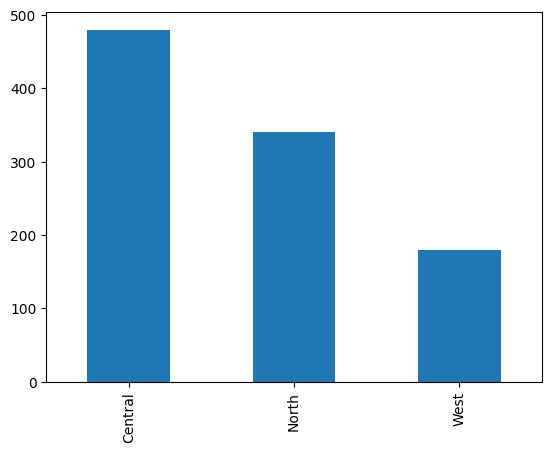

In [5]:
sales.warehouse.value_counts().plot(kind = "bar")

**Total sales made from each payment method**

<AxesSubplot: xlabel='payment'>

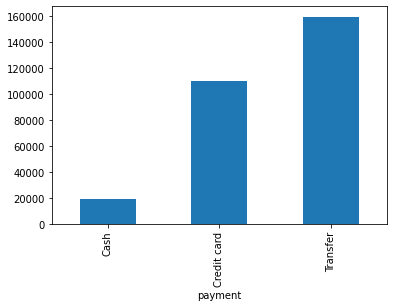

In [11]:
sales.groupby("payment")["total"].agg(np.sum).plot(kind = "bar")

## Exercises

Check this [repository](https://github.com/guipsamora/pandas_exercises) for exercises.  
This is how to import tsv files
```
pd.read_csv("<link>",sep='\t')

```